In [16]:
import requests
import pandas as pd
import numpy as np
from network import NeuralNetwork
from model.layers.dense import AdamDense, Dense
from model.activations.activation import *
from model.losses import *
import numpy as np
from influx import get_influx_data



In [17]:
def min_max_scale(column):
    return column / 10000

In [18]:
try:
    solar = pd.DataFrame(get_influx_data().raw["series"][0]["values"], columns=["time", "mean_value"])
    print("using influx")
except:
    solar = pd.read_csv(f'./data_daily.csv') 
    print("using csv")
solar["mean_value"] = solar["mean_value"] / 100
solar = solar.dropna()
solar['time'] = pd.to_datetime(solar['time'], yearfirst=True, utc=True)


url = f"https://archive-api.open-meteo.com/v1/archive?latitude=49.7751150&longitude=13.3604831&start_date={solar['time'].min().strftime('%Y-%m-%d')}&end_date={solar['time'].max().strftime('%Y-%m-%d')}&daily=weather_code,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,precipitation_hours,snowfall_sum,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,cloud_cover_mean,cloud_cover_max,cloud_cover_min,dew_point_2m_mean,dew_point_2m_max,dew_point_2m_min,et0_fao_evapotranspiration_sum,relative_humidity_2m_mean,relative_humidity_2m_max,relative_humidity_2m_min,snowfall_water_equivalent_sum,wind_gusts_10m_mean,wind_gusts_10m_min,wind_speed_10m_mean,wind_speed_10m_min,wet_bulb_temperature_2m_mean,wet_bulb_temperature_2m_max,wet_bulb_temperature_2m_min,vapour_pressure_deficit_max&timezone=GMT"


pred = pd.DataFrame(requests.get(url).json()["daily"])
pred["date"] = pd.to_datetime(pred["time"])
pred = pred.drop(["time"], axis=1)
pred["month"] = pred["date"].dt.month
pred["day"] = pred["date"].dt.day
pred["year"] = pred["date"].dt.year
pred = pred.drop(["date"], axis=1)
solar["day"] = solar["time"].dt.day
solar["month"] = solar["time"].dt.month
solar["year"] = solar["time"].dt.year
solar = solar.drop(["time"], axis=1)
data = pd.merge(pred, solar, on=["day", "month", "year"], how="inner")
data = data.drop(["year", "day"], axis=1)
columns_to_scale = data.columns.drop(["mean_value", "month"])  # Exclude 'mean_value' from scaling
data[columns_to_scale] = data[columns_to_scale].apply(min_max_scale)
data["month"] = np.cos((np.pi * data["month"]) / 6)
print(data["month"])

using csv
0     -8.660254e-01
1     -8.660254e-01
2     -8.660254e-01
3     -8.660254e-01
4     -8.660254e-01
           ...     
602    6.123234e-17
603    6.123234e-17
604    6.123234e-17
605    6.123234e-17
606    6.123234e-17
Name: month, Length: 607, dtype: float64


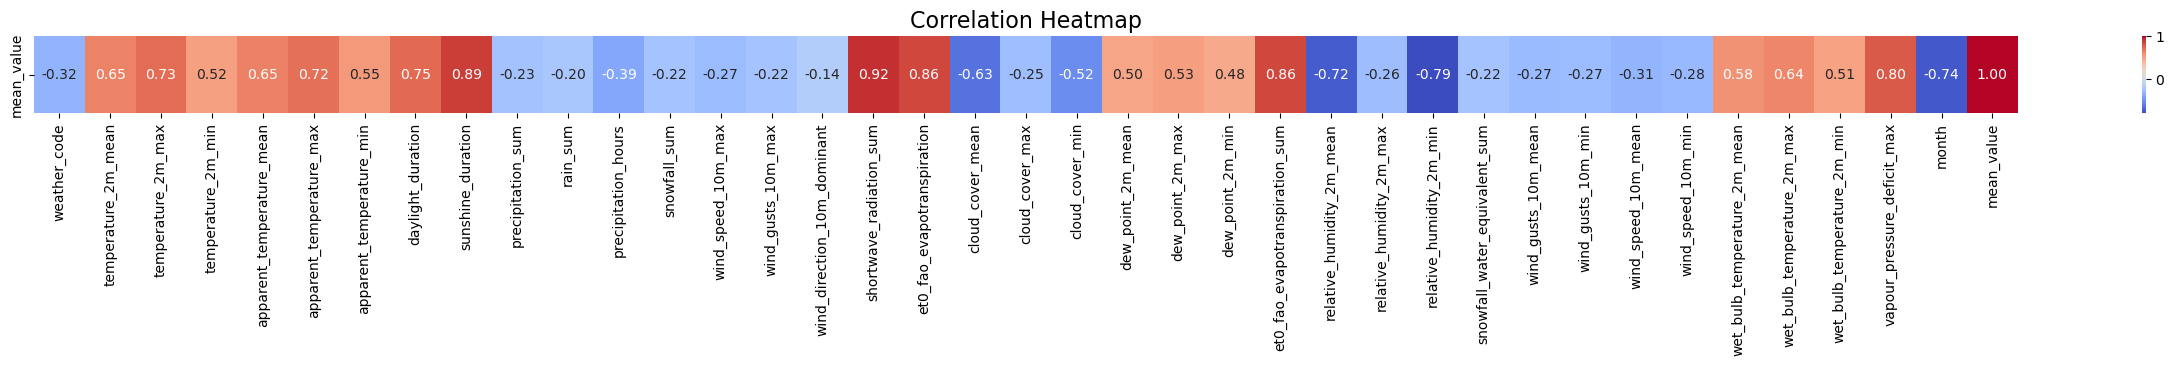

In [19]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(32, 1))
# sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap", fontsize=16)
sns.heatmap(data.corr()[["mean_value"]].transpose(), annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.show()

In [20]:
pd.set_option('display.max_columns', None)
data = data.dropna()

data = data.sample(frac=1)
data

,weather_code,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,precipitation_hours,snowfall_sum,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,cloud_cover_mean,cloud_cover_max,cloud_cover_min,dew_point_2m_mean,dew_point_2m_max,dew_point_2m_min,et0_fao_evapotranspiration_sum,relative_humidity_2m_mean,relative_humidity_2m_max,relative_humidity_2m_min,snowfall_water_equivalent_sum,wind_gusts_10m_mean,wind_gusts_10m_min,wind_speed_10m_mean,wind_speed_10m_min,wet_bulb_temperature_2m_mean,wet_bulb_temperature_2m_max,wet_bulb_temperature_2m_min,vapour_pressure_deficit_max,month,mean_value
395,0.0003,0.00215,0.00263,0.00178,0.00217,0.00273,0.00176,4.863966,4.359253,0.00000,0.00000,0.0000,0.0,0.00184,0.00364,0.0037,0.001971,0.000410,0.0062,0.0100,0.0009,0.00164,0.00173,0.00155,0.000410,0.0073,0.0092,0.0055,0.0,0.00303,0.00216,0.00151,0.00117,0.00181,0.00202,0.00162,0.000152,-5.000000e-01,0.184
337,0.0055,0.00148,0.00190,0.00107,0.00129,0.00167,0.00087,5.829781,5.045010,0.00030,0.00030,0.0008,0.0,0.00227,0.00493,0.0237,0.001875,0.000307,0.0063,0.0100,0.0018,0.00110,0.00132,0.00082,0.000307,0.0079,0.0094,0.0060,0.0,0.00345,0.00133,0.00160,0.00061,0.00124,0.00149,0.00098,0.000088,-8.660254e-01,0.110
287,0.0003,0.00177,0.00226,0.00123,0.00139,0.00193,0.00087,5.549473,5.040000,0.00000,0.00000,0.0000,0.0,0.00261,0.00518,0.0110,0.002751,0.000628,0.0036,0.0100,0.0000,0.00056,0.00073,0.00027,0.000628,0.0046,0.0057,0.0031,0.0,0.00401,0.00266,0.00203,0.00117,0.00110,0.00136,0.00077,0.000189,-8.660254e-01,0.226
145,0.0051,0.00081,0.00087,0.00077,0.00036,0.00040,0.00025,2.919556,0.000000,0.00001,0.00001,0.0001,0.0,0.00293,0.00565,0.0242,0.000107,0.000061,0.0100,0.0100,0.0100,0.00057,0.00064,0.00054,0.000061,0.0085,0.0088,0.0082,0.0,0.00465,0.00371,0.00237,0.00191,0.00066,0.00071,0.00063,0.000021,1.000000e+00,0.002
208,0.0003,0.00021,0.00076,-0.00009,-0.00014,0.00041,-0.00046,3.875899,1.912614,0.00000,0.00000,0.0000,0.0,0.00134,0.00281,0.0032,0.000726,0.000077,0.0097,0.0100,0.0056,0.00007,0.00025,-0.00015,0.000077,0.0091,0.0099,0.0070,0.0,0.00208,0.00148,0.00103,0.00071,0.00012,0.00047,-0.00013,0.000032,5.000000e-01,0.022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,0.0061,0.00152,0.00185,0.00132,0.00142,0.00170,0.00113,3.958877,1.048043,0.00048,0.00048,0.0007,0.0,0.00168,0.00335,0.0226,0.000450,0.000117,0.0096,0.0100,0.0048,0.00119,0.00138,0.00101,0.000117,0.0081,0.0093,0.0062,0.0,0.00235,0.00169,0.00117,0.00079,0.00131,0.00144,0.00113,0.000082,5.000000e-01,0.035
84,0.0061,0.00125,0.00157,0.00093,0.00108,0.00139,0.00081,4.046798,0.000000,0.00029,0.00029,0.0009,0.0,0.00202,0.00439,0.0289,0.000238,0.000089,0.0097,0.0100,0.0080,0.00096,0.00117,0.00083,0.000089,0.0083,0.0095,0.0065,0.0,0.00224,0.00058,0.00106,0.00026,0.00106,0.00128,0.00087,0.000062,5.000000e-01,0.017
548,0.0001,-0.00013,0.00038,-0.00044,-0.00050,-0.00005,-0.00078,3.373532,2.947562,0.00000,0.00000,0.0000,0.0,0.00127,0.00288,0.0052,0.000765,0.000074,0.0004,0.0035,0.0000,-0.00049,-0.00037,-0.00059,0.000074,0.0078,0.0091,0.0055,0.0,0.00142,0.00025,0.00064,0.00010,-0.00031,0.00002,-0.00053,0.000035,5.000000e-01,0.110
411,0.0063,0.00125,0.00158,0.00096,0.00100,0.00127,0.00077,4.515492,1.149988,0.00196,0.00196,0.0016,0.0,0.00358,0.00659,0.0359,0.000724,0.000133,0.0096,0.0100,0.0051,0.00103,0.00127,0.00083,0.000133,0.0087,0.0094,0.0072,0.0,0.00355,0.00083,0.00176,0.00047,0.00110,0.00130,0.00087,0.000050,-1.836970e-16,0.043


In [22]:


# data["month"] = (data['month']).apply(lambda x: abs(1 - abs(x - 6) / 5))


y = data["mean_value"]
X = data.drop(["mean_value"], axis=1)
X = X.to_numpy()
X =np.reshape(X, (X.shape[0],X.shape[1], 1))
y = np.reshape(y.to_numpy(), (y.shape[0], 1))
# network = [Dense(17,32), Softplus(), AdamDense(32, 64),  NormalizedTanh(),  AdamDense(64, 128),  Tanh(),  AdamDense(128, 1), Softplus()]
network = [Dense(38,64), Softplus(), Dense(64, 128),  Tanh(),  Dense(128, 32), Tanh(),  Dense(32, 16), Tanh(),  Dense(16, 1), Softplus()]
# network = [AdamDense(37,32), Softplus(), AdamDense(32, 16),  Tanh(),  AdamDense(16, 8), NormalizedTanh(),  AdamDense(8, 1), Softplus()]
# network = [Dense(38,32), Tanh(), Dense(32, 16),  Tanh(),  Dense(16, 8), Tanh(),  Dense(8, 1), Linear()]
n = NeuralNetwork(network)

trained_n = n.train(mse, mse_prime, X, y, epochs=20000, learning_rate=0.001, verbose=False)


Complete Validation on 10/20000 epoch, actual=941.0, prediction=1111.0, miss=308.0, percentage=192.0%, valid_error=0.2953392196407738, error=0.001649393369345602
Complete Validation on 20/20000 epoch, actual=941.0, prediction=1051.0, miss=266.0, percentage=165.0%, valid_error=0.21012835644359298, error=0.0011617563904680708
Complete Validation on 30/20000 epoch, actual=941.0, prediction=1027.0, miss=250.0, percentage=154.0%, valid_error=0.18190437499709353, error=0.0010045941073856032
Complete Validation on 40/20000 epoch, actual=941.0, prediction=1014.0, miss=241.0, percentage=147.0%, valid_error=0.16742812481131406, error=0.0009269842937906122
Complete Validation on 50/20000 epoch, actual=941.0, prediction=1005.0, miss=234.0, percentage=143.0%, valid_error=0.1582272623864702, error=0.0008796161703493598
Complete Validation on 60/20000 epoch, actual=941.0, prediction=998.0, miss=229.0, percentage=139.0%, valid_error=0.15184944662434766, error=0.0008472037912343178
Complete Validation 

7

In [1]:
import matplotlib.pylab as plt

plt.figure(figsize=(8, 5))
# plt.plot([n.error_rate[i] for i in range(len(n.error_rate)) if i == 0 or i % 10 == 0], label='List 1', marker='o', linestyle='-', color='blue')
plt.plot(n.real_error[2:], label='List 2', marker='s', linestyle='--', color='orange')

# Add title and labels
plt.title('Comparison of Two Lists', fontsize=14)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Value', fontsize=12)

# Add grid and legend
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

NameError: name 'n' is not defined

<Figure size 800x500 with 0 Axes>

In [8]:
from daily import train
import inspect
lines = inspect.getsource(train)
print(lines)

def train():
    try:
        solar = pd.DataFrame(get_influx_data().raw["series"][0]["values"], columns=["time", "mean_value"])
        print("using influx", flush=True)
    except:
        solar = pd.read_csv('./data_daily.csv') 
        print("using csv", flush=True)
    solar["mean_value"] = solar["mean_value"] / 100
    solar = solar.dropna()
    solar['time'] = pd.to_datetime(solar['time'], yearfirst=True, utc=True)

    url = f"https://archive-api.open-meteo.com/v1/archive?latitude=49.7751150&longitude=13.3604831&start_date={solar['time'].min().strftime('%Y-%m-%d')}&end_date={solar['time'].max().strftime('%Y-%m-%d')}&daily=weather_code,temperature_2m_mean,temperature_2m_max,temperature_2m_min,apparent_temperature_mean,apparent_temperature_max,apparent_temperature_min,daylight_duration,sunshine_duration,precipitation_sum,rain_sum,precipitation_hours,snowfall_sum,wind_speed_10m_max,wind_gusts_10m_max,wind_direction_10m_dominant,shortwave_radiation_sum,et0_fao_evapotranspiration,cl

In [9]:
train()

using csv


/mnt/d/Projects/Hasp/solar_prediction/app/model/activations/activation.py:97: RuntimeWarning: overflow encountered in exp
  return np.log(1 + np.exp(x))
/mnt/d/Projects/Hasp/solar_prediction/app/model/activations/activation.py:100: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


ValueError: cannot convert float NaN to integer